### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv("student_score.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

#### Dropping the unnamed column

In [7]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [48]:
df = df.drop("Unnamed: 0", axis = 1)# deleting vertically

KeyError: "['Unnamed: 0'] not found in axis"

#### changing weeklyStudyhour column

In [8]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace("10-May",'5-10')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [12]:
df.dropna(axis=0, how='any', inplace=True)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


### gender distribution

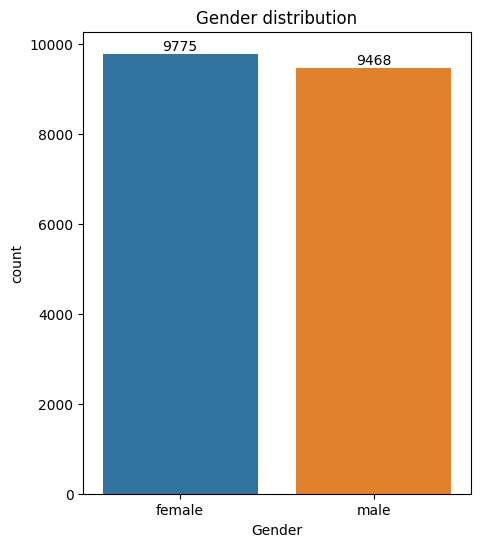

In [32]:
plt.figure(figsize = (5,6))
ax = sns.countplot(data = df, x = 'Gender')
ax.bar_label(ax.containers[0])
plt.title('Gender distribution')
plt.show()

In [21]:
gb = df.groupby("ParentEduc").agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


##### The below chart concludes that there is an impact on the students score due to their parent's marital education level

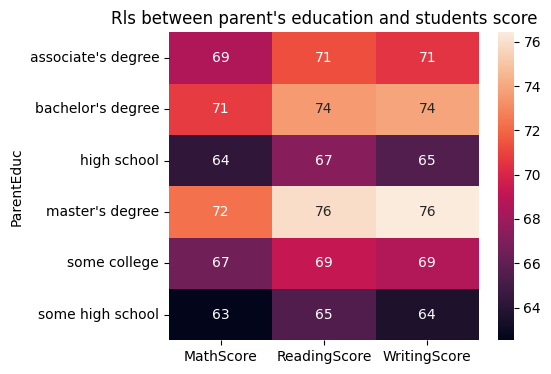

In [33]:
plt.figure(figsize = (5,4))
sns.heatmap(gb, annot = True)
plt.title("Rls between parent's education and students score")
plt.show()

#### grouping marital status of parents and studies

In [30]:
gb1 = df.groupby("ParentMaritalStatus").agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.730344     69.816339     68.954545
married              66.705241     69.474248     68.488509
single               66.285590     69.388021     68.543403
widowed              68.083784     70.662162     69.651351


##### The below chart concludes that there is no negligible impact on the students score due to their parent's marital status

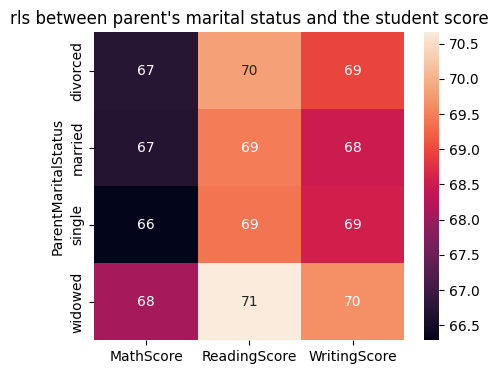

In [34]:
plt.figure(figsize = (5,4))
sns.heatmap(gb1, annot = True)
plt.title("rls between parent's marital status and the student score")
plt.show()

#### distribution of ethinic groups 

In [35]:
print(df['EthnicGroup'].unique())

['group B' 'group C' 'group D' 'group A' 'group E']


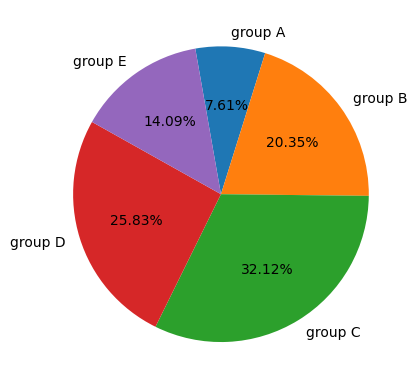

In [47]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
l = ['group A', 'group B', 'group C', 'group D', 'group E']
plt.pie(mlist, labels = l, autopct = "%.2f%%", startangle = 100, counterclock = False)
plt.show()